<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/TF_ZTM_03_Comuter_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Convolutional Neural Network and Computer Vision with TensorFlow

## Get the Data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-05-22 09:17:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 209.85.200.128, 142.251.171.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   206MB/s    in 0.5s    

2023-05-22 09:17:04 (206 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#Unzip the Downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")

In [3]:
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


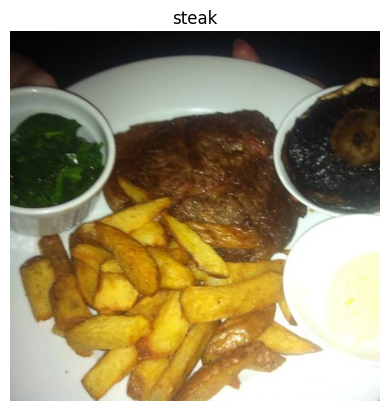

In [9]:


# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
# View the img (actually just a big array/tensor)
img

array([[[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  5,   5,   7],
        [  6,   6,   8],
        [  6,   6,   8]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  5,   5,   7],
        [  5,   5,   7],
        [  6,   6,   8]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  4,   4,   6],
        [  5,   5,   7],
        [  5,   5,   7]],

       ...,

       [[162, 168, 164],
        [164, 170, 166],
        [166, 172, 168],
        ...,
        [222, 230, 233],
        [213, 220, 226],
        [203, 210, 216]],

       [[160, 169, 164],
        [161, 170, 165],
        [163, 172, 167],
        ...,
        [214, 222, 225],
        [199, 206, 212],
        [184, 191, 197]],

       [[160, 169, 164],
        [161, 170, 165],
        [163, 172, 167],
        ...,
        [206, 213, 219],
        [187, 194, 200],
        [169, 176, 182]]

In [11]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        ...,
        [0.01960784, 0.01960784, 0.02745098],
        [0.02352941, 0.02352941, 0.03137255],
        [0.02352941, 0.02352941, 0.03137255]],

       [[0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        ...,
        [0.01960784, 0.01960784, 0.02745098],
        [0.01960784, 0.01960784, 0.02745098],
        [0.02352941, 0.02352941, 0.03137255]],

       [[0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        ...,
        [0.01568627, 0.01568627, 0.02352941],
        [0.01960784, 0.01960784, 0.02745098],
        [0.01960784, 0.01960784, 0.02745098]],

       ...,

       [[0.63529412, 0.65882353, 0.64313725],
        [0.64313725, 0.66666667, 0.65098039],
        [0.65098039, 0

## An end to end example
Let's build an End to end Neural Network
* Load our images
* preprocess
* Build CNN to find patterns
* Compile the CNN
* Fit the CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data (Get all the pixel values to be between 0 &1, also called normalization)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="/content/pizza_steak/train"
test_dir="pizza_steak/test"

#import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
model_1= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 34s 373ms/step - loss: 0.5812 - accuracy: 0.7000 - val_loss: 0.4494 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4837 - accuracy: 0.7793 - val_loss: 0.3956 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 13s 274ms/step - loss: 0.4304 - accuracy: 0.8147 - val_loss: 0.3436 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 16s 338ms/step - loss: 0.3885 - accuracy: 0.8253 - val_loss: 0.3177 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 19s 411ms/step - loss: 0.3715 - accuracy: 0.8420 - val_loss: 0.3639 - val_accuracy: 0.8440


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
#Using the sae model as before with the different dataset

In [15]:
tf.random.set_seed(42)

#Create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 19s 365ms/step - loss: 1.5646 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 234ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 15s 309ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [17]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)) 

Epoch 1/5
47/47 [==============================] - 14s 236ms/step - loss: 1.9549 - accuracy: 0.6160 - val_loss: 1.2074 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 19s 420ms/step - loss: 0.7503 - accuracy: 0.7020 - val_loss: 0.7660 - val_accuracy: 0.5800
Epoch 3/5
47/47 [==============================] - 12s 264ms/step - loss: 0.5873 - accuracy: 0.7340 - val_loss: 0.7163 - val_accuracy: 0.5760
Epoch 4/5
47/47 [==============================] - 15s 314ms/step - loss: 0.6229 - accuracy: 0.7207 - val_loss: 0.6150 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.5806 - accuracy: 0.7553 - val_loss: 0.5167 - val_accuracy: 0.7720


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Even though there are less number of features/parameters in the Model 1 or any model in General, it is better in to decypher the patterns in the data. This is against the theory of more is better.


## Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data.
(prepare it for th model, the main step here is scaling/normalizing)
3. Created a model (started with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different params and improve the model
7. Repeat iuntil satisfied

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


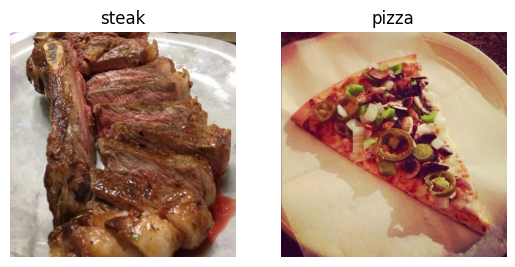

In [25]:
#Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img= view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)

In [27]:
#Define directory dataset paths
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

Our next step is turning our data into **batches**

A batch is a small subset of the data. Rather than look at all ~10k images at a time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images might not fit into the memory of your processor(GPU)
2. Trying to learn the patterns in 10000 images in one hit coud result in the model not being able to learn very well.

Why 32??

Because 32 is good.

In [28]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)